In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduction to Regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
print(tf.__version__)

2.15.0


# Creating data to view and fit

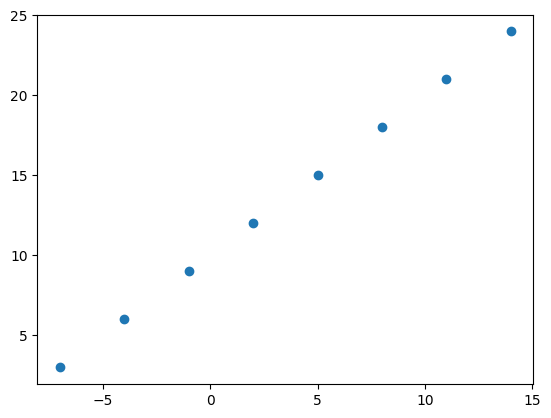

In [ ]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

## Input and ouput shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
X.ndim, y.ndim

(1, 1)

In [ ]:
X.shape, y.shape

((8,), (8,))

In [ ]:
X[0].ndim

0

In [ ]:
X[0], y[0]

(-7.0, 3.0)

In [ ]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [ ]:
tf.expand_dims(X, axis=-1), X

(<tf.Tensor: shape=(8, 1), dtype=float32, numpy=
 array([[-7.],
        [-4.],
        [-1.],
        [ 2.],
        [ 5.],
        [ 8.],
        [11.],
        [14.]], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>)

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1) # hidden units = neurons
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # loss function
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]) # evaluation metrics

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 609ms/step - loss: 15.3915 - mae: 15.3915
Epoch 2/5
1/1 [==============================] - 0s 15ms/step - loss: 15.1103 - mae: 15.1103
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 14.8785 - mae: 14.8785
Epoch 4/5
1/1 [==============================] - 0s 13ms/step - loss: 14.7460 - mae: 14.7460
Epoch 5/5
1/1 [==============================] - 0s 10ms/step - loss: 14.6135 - mae: 14.6135


In [ ]:
# check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Try and make a prediction using our model
model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[-4.9385476]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **creating a model** - we might add more layers, increase the number of hidden units ( all called neurons ) within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn from).

In [ ]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential ([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 428ms/step - loss: 14.3210 - mae: 14.3210
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 14.1885 - mae: 14.1885
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 14.0560 - mae: 14.0560
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 13.9235 - mae: 13.9235
Epoch 5/100
1/1 [==============================] - 0s 15ms/step - loss: 13.7910 - mae: 13.7910
Epoch 6/100
1/1 [==============================] - 0s 15ms/step - loss: 13.6585 - mae: 13.6585
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.5260 - mae: 13.5260
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 13.3935 - mae: 13.3935
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 13.2610 - mae: 13.2610
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.1285 - mae: 13.1285
Epoch 11/100
1/1 [==============================

In [ ]:
# Remind ourselves of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 101ms/step


array([[29.624605]], dtype=float32)

In [ ]:
# Let's see if we can make another change to improve our model
tf.random.set_seed(42)
# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss="mae",
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 770ms/step - loss: 14.2249 - mae: 14.2249
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 14.1609 - mae: 14.1609
Epoch 3/100
1/1 [==============================] - 0s 14ms/step - loss: 14.0969 - mae: 14.0969
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 14.0330 - mae: 14.0330
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 13.9691 - mae: 13.9691
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.9054 - mae: 13.9054
Epoch 7/100
1/1 [==============================] - 0s 12ms/step - loss: 13.8417 - mae: 13.8417
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 13.7780 - mae: 13.7780
Epoch 9/100
1/1 [==============================] - 0s 13ms/step - loss: 13.7144 - mae: 13.7144
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 13.6509 - mae: 13.6509
Epoch 11/100
1/1 [==============================

In [ ]:
# Let's remind ourselve of the data
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [ ]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 84ms/step


array([[27.19602]], dtype=float32)

# Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```

When it comes to evaluation.. there are 3 words you should memorize:
> "Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

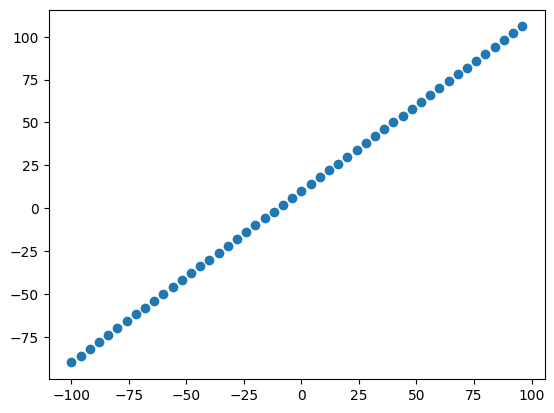

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y);

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - the model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what is has learned, this set is typically  10-15% of the total data available.

In [ ]:
# Check the length of how many samples we have
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

Now we've got our data in training and test sets... let's visualize it again!

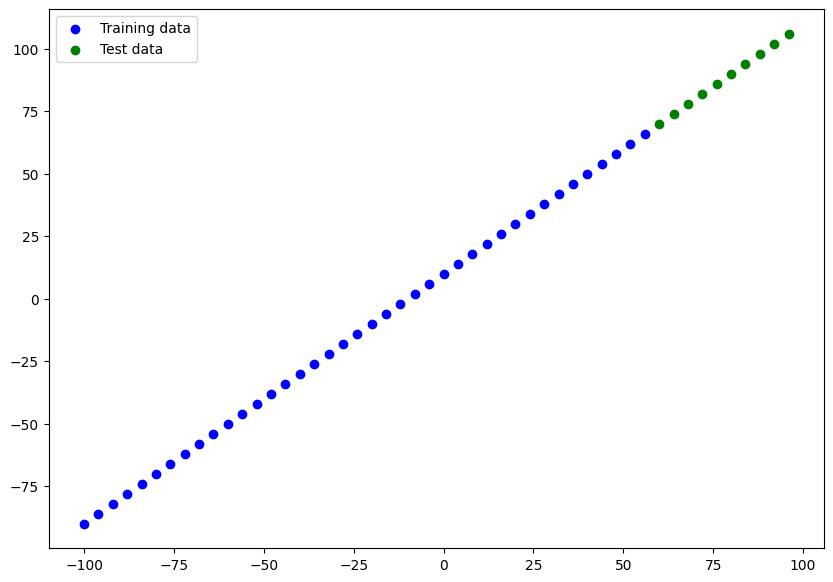

In [ ]:
plt.figure(figsize=(10, 7))
# Plot training data in blue
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Test data")
# Show a legend
plt.legend();


In [ ]:
# Let's have a look at how to build a neural network for our data
# Let's create a model which builds automatically by defining the input_shape argument
tf.random.set_seed(42)
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, input_shape=[1], name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
2/2 [==============================] - 1s 14ms/step - loss: 34.6269 - mae: 34.6269
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 28.5460 - mae: 28.5460
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 32.2470 - mae: 32.2470
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 14.3716 - mae: 14.3716
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 20.3034 - mae: 20.3034
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 8.1836 - mae: 8.1836
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 17.3801 - mae: 17.3801
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 17.2778 - mae: 17.2778
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 30.2628 - mae: 30.2628
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 12.1255 - mae: 12.1255
Epoch 11/100
2/2 [==============================] - 0s 10

### Visualizing the model

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these are parameters aren't updated during training (this is typical when you bring in already learn patterns or parameters from other models during **transfer leraning**).

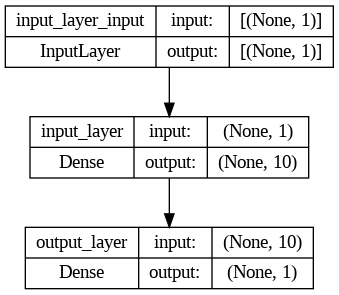

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels.

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions).

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 109ms/step


array([[35.015663],
       [37.25462 ],
       [39.493576],
       [41.73254 ],
       [43.971497],
       [46.210453],
       [48.449417],
       [50.688374],
       [52.927338],
       [55.166294]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into a function.

In [ ]:
# Let's create a plotting function
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c="b", label="Training data")
  # PLot testing data in green
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend
  plt.legend()

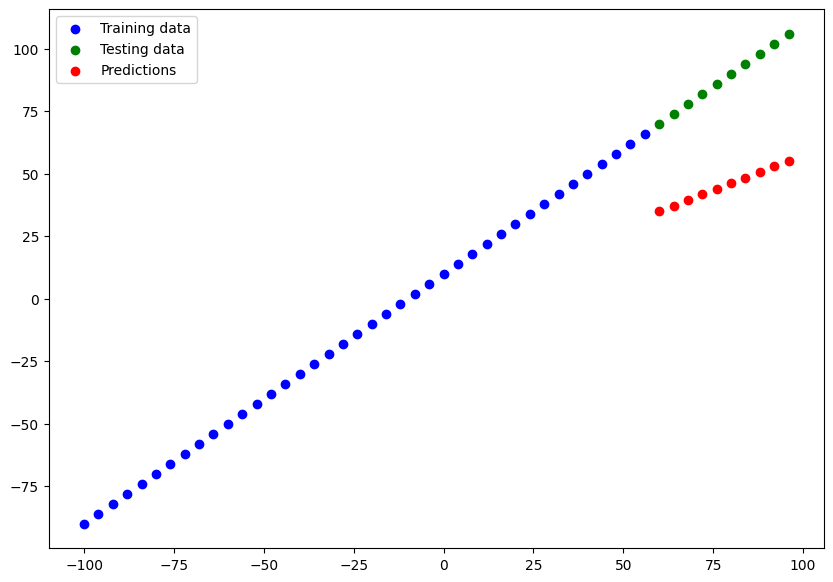

In [ ]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's preformance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean squared error, "square the average errors"

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test) # It is related to the metrics and loss function we define

1/1 [==============================] - 0s 267ms/step - loss: 42.9090 - mae: 42.9090


[42.909019470214844, 42.909019470214844]

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, y_pred)
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([52.984337, 50.74538 , 48.506424, 46.26746 , 44.028503, 41.789547,
       39.550583, 37.311626, 35.072662, 32.833706], dtype=float32)>

In [ ]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[35.015663],
       [37.25462 ],
       [39.493576],
       [41.73254 ],
       [43.971497],
       [46.210453],
       [48.449417],
       [50.688374],
       [52.927338],
       [55.166294]], dtype=float32)>

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

As you can see, the shape of the y_pred is not in the shape of the y_test, so we have to reshape them.

The output result of mae and mse should be one value. `MEAN`

In [ ]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([35.015663, 37.25462 , 39.493576, 41.73254 , 43.971497, 46.210453,
       48.449417, 50.688374, 52.927338, 55.166294], dtype=float32)>

In [ ]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=42.909023>

In [ ]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=1866.7698>

In [ ]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_test, tf.squeeze(y_pred))


def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_test, tf.squeeze(y_pred))

### Running experiments to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to trian on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build `model_1`**

In [ ]:
# Set up a random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 11ms/step - loss: 26.1647 - mae: 26.1647
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5372 - mae: 9.5372
Epoch 3/100
2/2 [==============================] - 0s 9ms/step - loss: 11.1339 - mae: 11.1339
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 9.2872 - mae: 9.2872
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 10.1535 - mae: 10.1535
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4183 - mae: 9.4183
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 8.5607 - mae: 8.5607
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 9.0459 - mae: 9.0459
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 18.7224 - mae: 18.7224
Epoch 10/100
2/2 [==============================] - 0s 7ms/step - loss: 10.0998 - mae: 10.0998
Epoch 11/100
2/2 [==============================] - 0s 7ms/step - l

1/1 [==============================] - 0s 61ms/step


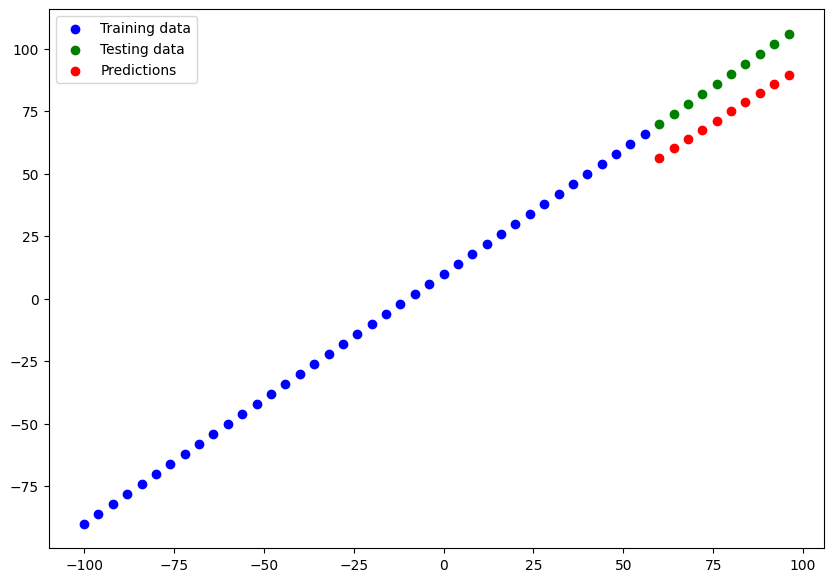

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=y_preds_1)

In [ ]:
tf.constant(y_preds_1), tf.squeeze(y_preds_1)

(<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
 array([[56.507725],
        [60.18874 ],
        [63.869755],
        [67.55077 ],
        [71.23179 ],
        [74.9128  ],
        [78.59382 ],
        [82.27483 ],
        [85.95585 ],
        [89.63686 ]], dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([56.507725, 60.18874 , 63.869755, 67.55077 , 71.23179 , 74.9128  ,
        78.59382 , 82.27483 , 85.95585 , 89.63686 ], dtype=float32)>)

In [ ]:
# Calculate model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=14.927706>,
 <tf.Tensor: shape=(), dtype=float32, numpy=223.67581>)

**Build `model_1`**

* 2 denese layers, trained for 100 epochs

In [ ]:
# Set up the random seed
tf.random.set_seed(42)

# 1. Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 10ms/step - loss: 47.5917 - mse: 3145.6313
Epoch 2/100
2/2 [==============================] - 0s 12ms/step - loss: 34.9706 - mse: 1612.4324
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 37.2835 - mse: 2161.7256
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 14.2430 - mse: 289.8808
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 20.2664 - mse: 562.0533
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 8.6802 - mse: 106.2832
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 16.6400 - mse: 359.3600
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 16.9708 - mse: 390.0071
Epoch 9/100
2/2 [==============================] - 0s 7ms/step - loss: 29.3608 - mse: 1181.7878
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 14.0191 - mse: 245.9049
Epoch 11/100
2/2 [==========================

1/1 [==============================] - 0s 34ms/step


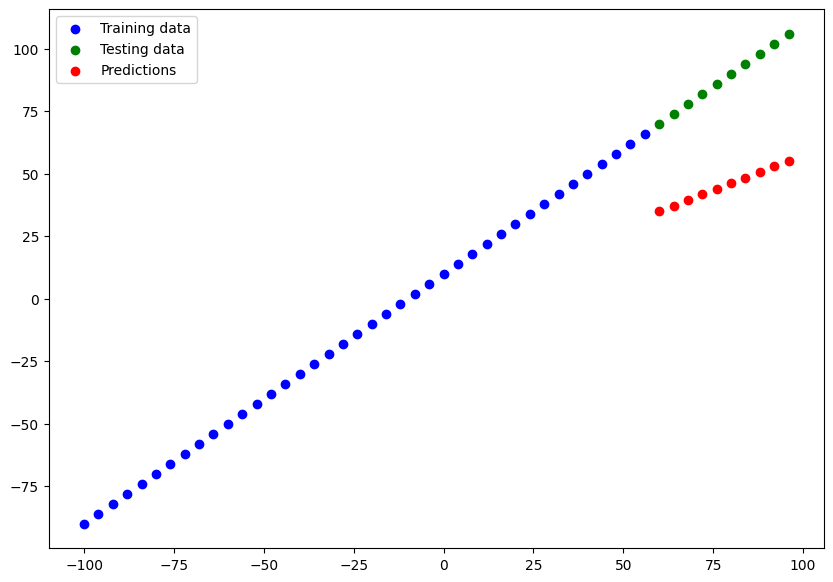

In [ ]:
# Make and plot predictions of model_2
y_preds_2 = model.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculate model_2 evaluation metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=42.909023>,
 <tf.Tensor: shape=(), dtype=float32, numpy=1866.7698>)

**Build `model_3`**

* 2 layers, trained for 500 epochs

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 13ms/step - loss: 13.0626 - mse: 375.4826
Epoch 2/500
2/2 [==============================] - 0s 7ms/step - loss: 20.5369 - mse: 687.4180
Epoch 3/500
2/2 [==============================] - 0s 6ms/step - loss: 21.3648 - mse: 674.8069
Epoch 4/500
2/2 [==============================] - 0s 6ms/step - loss: 13.7129 - mse: 255.9858
Epoch 5/500
2/2 [==============================] - 0s 7ms/step - loss: 18.6212 - mse: 470.0716
Epoch 6/500
2/2 [==============================] - 0s 7ms/step - loss: 9.3764 - mse: 125.6457
Epoch 7/500
2/2 [==============================] - 0s 7ms/step - loss: 10.3676 - mse: 140.4854
Epoch 8/500
2/2 [==============================] - 0s 8ms/step - loss: 11.2662 - mse: 183.0762
Epoch 9/500
2/2 [==============================] - 0s 8ms/step - loss: 42.4327 - mse: 2883.1465
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 29.5729 - mse: 1238.5183
Epoch 11/500
2/2 [=============================

1/1 [==============================] - 0s 62ms/step


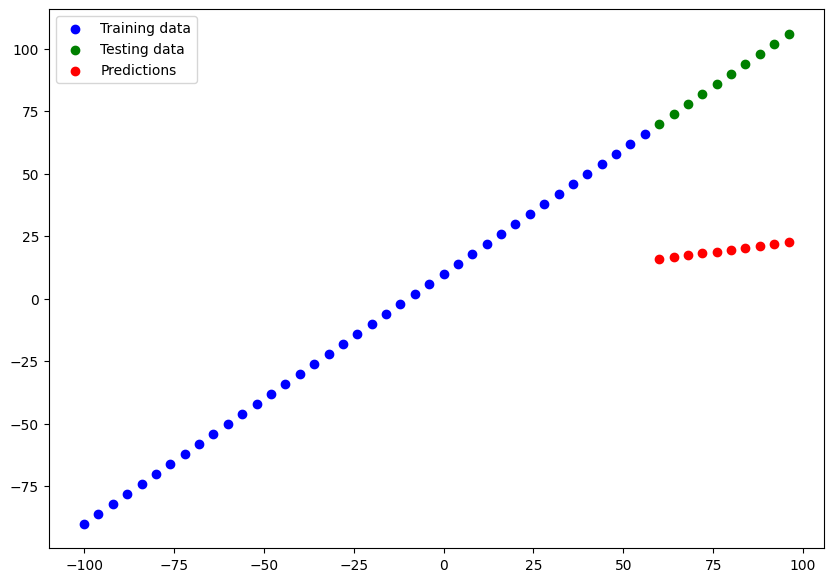

In [ ]:
# Make and plot some predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculate model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.72182>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4809.1963>)

  🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.

### Comparing the results of our experiments

We've run a few experiments, let's compare the results.

In [ ]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,14.927706,223.675812
1,model_2,42.909023,1866.769775
2,model_3,68.721817,4809.196289


Looks like `model_2` performed the best...

In [ ]:
model_2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between you experiments you do, the more things you'll, the more things you'll figure out which don't work and in turn, get closer to figuring our what does work. Remember the machine learning practioner's motto: "Experiment, Experiment, Experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experminets.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app.

There are two main formats we can save our model's too:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model
model_2.save("/content/drive/MyDrive/Deep Learning Course/Model/best_model_SavedModel_format") # Better with pure tensorflow code

In [ ]:
# Save model using the HDF5 format
model_2.save("/content/drive/MyDrive/Deep Learning Course/Model/best_model_HDF5_format.h5") # if we want to use it outside the tensorflow

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Loading in saved model

In [ ]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("/content/drive/MyDrive/Deep Learning Course/Model/best_model_SavedModel_format")
loaded_SavedModel_format.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 84ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
mae(y_true=y_test, y_pred=model_2_preds) == mae(y_true=y_test, y_pred=loaded_SavedModel_format_preds)

<tf.Tensor: shape=(), dtype=bool, numpy=True>

In [ ]:
# Load in a model using .h5 format
loaded_h5_model = tf.keras.models.load_model("/content/drive/MyDrive/Deep Learning Course/Model/best_model_HDF5_format.h5")
loaded_h5_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 10)                20        
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (124.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
# Check to see if loaded .h5 model predictions match model_2
model_2_preds = model_2.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_2_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 85ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:
1. You can go to the "files" tab ans click "download".
2. Use code (see the cell below).
3. Save it to Google Drive by connecting Google Drive and copying it there (see the 2nd code cell below).

In [ ]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/drive/MyDrive/Deep Learning Course/Model/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp path_of_the_model path_to_where_to

cp: cannot stat 'path_of_the_model': No such file or directory


In [ ]:
!ls path_to_where_to # You can make sure if it is transfered

ls: cannot access 'path_to_where_to': No such file or directory


## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Import our data
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Let's try one-hot encode our DataFrame so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,True,False,False,True,False,False,False,True
1,18,33.770,1,1725.55230,False,True,True,False,False,False,True,False
2,28,33.000,3,4449.46200,False,True,True,False,False,False,True,False
3,33,22.705,0,21984.47061,False,True,True,False,False,True,False,False
4,32,28.880,0,3866.85520,False,True,True,False,False,True,False,False


In [ ]:
insurance_one_hot.isna().sum()

age                 0
bmi                 0
children            0
charges             0
sex_female          0
sex_male            0
smoker_no           0
smoker_yes          0
region_northeast    0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64

In [ ]:
# Create X & y values (featuers and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]
print(X.head())
print(y.head())

   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
0   19  27.900         0        True     False      False        True   
1   18  33.770         1       False      True       True       False   
2   28  33.000         3       False      True       True       False   
3   33  22.705         0       False      True       True       False   
4   32  28.880         0       False      True       True       False   

   region_northeast  region_northwest  region_southeast  region_southwest  
0             False             False             False              True  
1             False             False              True             False  
2             False             False              True             False  
3             False              True             False             False  
4             False              True             False             False  
0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build a neural network
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="relu")
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(tf.convert_to_tensor(X_train,dtype=tf.int64), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8739.4209 - mae: 8739.4209
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7875.4683 - mae: 7875.4683
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7568.6401 - mae: 7568.6401
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7729.1792 - mae: 7729.1792
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7675.7656 - mae: 7675.7656
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7625.1592 - mae: 7625.1592
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7600.0684 - mae: 7600.0684
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7822.2515 - mae: 7822.2515
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7556.8242 - mae: 7556.8242
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7747.2319 - mae: 7747.2319

In [ ]:
# Check the results of insurance model on the test data
insurance_model.evaluate(tf.convert_to_tensor(X_test, dtype=tf.int64), y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7913.2593 - mae: 7913.2593


[7913.25927734375, 7913.25927734375]

# Right now it looks like our model is not performing well... let's try and improve it!

To try improve our model, we'll run two experiments:
1. Add an extra layer with more hidden units and use Adam optimizer
2. Train for longer

In [ ]:
# Set up a random seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.convert_to_tensor(X_train, dtype=tf.int64), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13268.0430 - mae: 13268.0430
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13058.1758 - mae: 13058.1758
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12647.3545 - mae: 12647.3545
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 11875.2021 - mae: 11875.2021
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 10642.4961 - mae: 10642.4961
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 9164.8232 - mae: 9164.8232
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7928.5278 - mae: 7928.5278
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 7465.5161 - mae: 7465.5161
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7405.1592 - mae: 7405.1592
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7385.7329 - mae:

In [ ]:
# Evaluate larger model
insurance_model_2.evaluate(tf.convert_to_tensor(X_test, dtype=tf.int64), y_test)

9/9 [==============================] - 0s 2ms/step - loss: 4741.1709 - mae: 4741.1709


[4741.1708984375, 4741.1708984375]

In [ ]:
# Setup a random seed
tf.random.set_seed(42)


# 1. Create the model same as above
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(tf.convert_to_tensor(X_train, dtype=tf.int64), y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 2ms/step - loss: 13311.8994 - mae: 13311.8994
Epoch 2/200
34/34 [==============================] - 0s 2ms/step - loss: 13164.8779 - mae: 13164.8779
Epoch 3/200
34/34 [==============================] - 0s 2ms/step - loss: 12853.3516 - mae: 12853.3516
Epoch 4/200
34/34 [==============================] - 0s 2ms/step - loss: 12228.3643 - mae: 12228.3643
Epoch 5/200
34/34 [==============================] - 0s 2ms/step - loss: 11148.4502 - mae: 11148.4502
Epoch 6/200
34/34 [==============================] - 0s 2ms/step - loss: 9701.7617 - mae: 9701.7617
Epoch 7/200
34/34 [==============================] - 0s 2ms/step - loss: 8307.7363 - mae: 8307.7363
Epoch 8/200
34/34 [==============================] - 0s 2ms/step - loss: 7574.2363 - mae: 7574.2363
Epoch 9/200
34/34 [==============================] - 0s 2ms/step - loss: 7435.3809 - mae: 7435.3809
Epoch 10/200
34/34 [==============================] - 0s 2ms/step - loss: 7413.8491 - mae:

In [ ]:
# Evaluate our third model
insurance_model_3.evaluate(tf.convert_to_tensor(X_test, dtype=tf.int64), y_test)

9/9 [==============================] - 0s 5ms/step - loss: 3499.8245 - mae: 3499.8245


[3499.824462890625, 3499.824462890625]

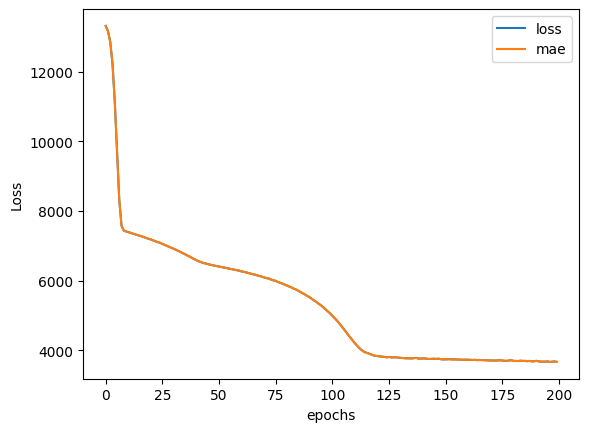

In [ ]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("epochs");

> 🧐 **Question:** How long should you train for?

It depends. Really... it depends on the problem you're working on. However, many people have asked this question before... so TensorFlow has a solution! It's called the EarlyStopping.

## Preprocessing Data ( normalization and standardization )

In terms of scaling values, neural network tends to prefer normalization.

If you're not sure what to use, you could try both and see which performs better.

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn.

**Note:** The fit method is calculating the mean and variance of each of the features present in our data. The transform method is transforming all the features using the respective mean and variance.

In [94]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these column between 0 to 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [95]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [97]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [98]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Let's build a neural netwrok model for the normalized and OneHotencoded data.

In [103]:
# Build a neural network model to fit on our normalized data
# Setup a random seed
tf.random.set_seed(42)

# 1. Create our model
normalized_insurance_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
normalized_insurance_model_1.compile(loss=tf.keras.losses.mae,
                                     optimizer=tf.keras.optimizers.Adam(),
                                     metrics=["mae"])

# 3. Fit the model
normalized_insurance_model_1.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13343.3584 - mae: 13343.3584
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13333.9814 - mae: 13333.9814
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 13311.1494 - mae: 13311.1494
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 13264.5488 - mae: 13264.5488
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 13183.6348 - mae: 13183.6348
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 13057.5986 - mae: 13057.5986
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 12875.9111 - mae: 12875.9111
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 12628.3633 - mae: 12628.3633
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 12304.7207 - mae: 12304.7207
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 11901.68

In [104]:
# Evaluate our normalized model
normalized_insurance_model_1.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3438.0801 - mae: 3438.0801


[3438.080078125, 3438.080078125]

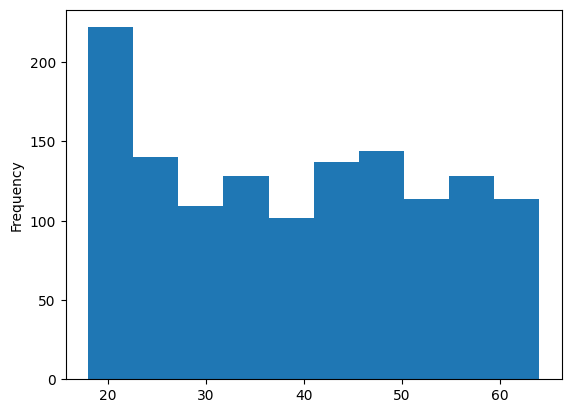

In [85]:
X["age"].plot(kind="hist");

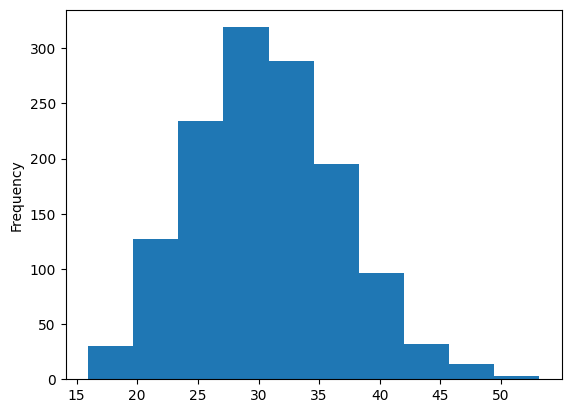

In [86]:
X["bmi"].plot(kind="hist");